# LSTM for Stock Market Prediction - An Example

In [10]:
import numpy as np 
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# to set data path
dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'
# dataPath = 'C:/YONG/m1710/myPydata/'

# https://www.kaggle.com/amarpreetsingh/stock-prediction-lstm-using-keras/notebook 

### Data Loading 

In [13]:
# S&P 500 Stock Data
# 
# data = pd.read_csv(dataPath + 'all_stocks_5yr.csv')
# data = data[data.Name.isin(['GOOGL', 'AMZN','AAPL','FDX','GM','HPE','MSFT','WMT','MSFT','ZTS'])]
# data.to_csv(dataPath + 'select_stocks_5yr.csv')
data = pd.read_csv(dataPath + 'select_stocks_5yr.csv')

print(data.columns)
print('Names :: ', data.Name.unique()[:20])
print(data.tail())

cl = data[data['Name']=='MSFT'].Close

print(cl.shape)
print(cl.head())

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')
Names ::  ['GOOGL' 'AMZN' 'AAPL' 'FDX' 'GM' 'HPE' 'MSFT' 'WMT' 'ZTS']
       Unnamed: 0        Date   Open   High    Low  Close     Volume Name
10400      606796  2017-08-07  62.12  62.34  61.25  61.83  4208287.0  ZTS
10401      606797  2017-08-08  60.49  61.00  59.50  60.00  4663668.0  ZTS
10402      606798  2017-08-09  59.95  60.87  59.76  60.81  4017297.0  ZTS
10403      606799  2017-08-10  60.87  61.37  59.71  59.74  2690725.0  ZTS
10404      606800  2017-08-11  60.05  60.22  59.64  59.73  2285863.0  ZTS
(1258,)
6748    30.39
6749    30.13
6750    30.20
6751    30.78
6752    30.90
Name: Close, dtype: float64


### Data Preparation

In [14]:
scl = MinMaxScaler()

#Scale the data
cl = np.array(cl).reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

array([[0.08401254],
       [0.07857889],
       [0.0800418 ],
       ...,
       [0.96342738],
       [0.94127482],
       [0.96405434]])

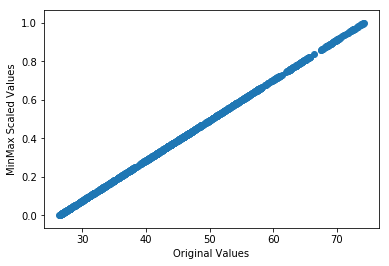

In [4]:
# What is MinMax Scaling?

plt.scatter(scl.inverse_transform(cl), cl)
plt.xlabel('Original Values')
plt.ylabel('MinMax Scaled Values')
plt.show()

In [49]:
#Create a function to process the data into 7 day look back slices

def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

X,y = processData(cl,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]

print('Train set :', X_train.shape[0], y_train.shape[0])
print('Test set :', X_test.shape[0], y_test.shape[0])

print('\nTraining Set : \n', X_train[:3])
# slides one day

Train set : 1000 1000
Test set : 250 250

Training Set : 
 [[0.08401254 0.07857889 0.0800418  0.09216301 0.09467085 0.09132706
  0.09258098]
 [0.07857889 0.0800418  0.09216301 0.09467085 0.09132706 0.09258098
  0.08714734]
 [0.0800418  0.09216301 0.09467085 0.09132706 0.09258098 0.08714734
  0.08129572]]


### Model Building

In [33]:
# Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(7,1), recurrent_dropout=0.4))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)
# history = model.fit(X_train,y_train,epochs=300)

Train on 1000 samples, validate on 250 samples
Epoch 1/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0020 - val_loss: 0.0039
Epoch 2/300
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 3/300
1000/1000 [==============================] - 1s 1ms/step - loss: 8.9477e-04 - val_loss: 5.9429e-04
Epoch 4/300
1000/1000 [==============================] - 1s 1ms/step - loss: 8.1966e-04 - val_loss: 0.0017
Epoch 5/300
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0012 - val_loss: 0.0026
Epoch 6/300
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0011 - val_loss: 5.2401e-04
Epoch 7/300
1000/1000 [==============================] - 1s 1ms/step - loss: 6.1648e-04 - val_loss: 0.0010
Epoch 8/300
1000/1000 [==============================] - 1s 1ms/step - loss: 8.5766e-04 - val_loss: 0.0045
Epoch 9/300
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0010 - val_loss: 0.0017
Ep

1000/1000 [==============================] - 1s 1ms/step - loss: 3.8760e-04 - val_loss: 1.9042e-04
Epoch 148/300
1000/1000 [==============================] - 1s 1ms/step - loss: 4.7312e-04 - val_loss: 2.4731e-04
Epoch 149/300
1000/1000 [==============================] - 1s 1ms/step - loss: 5.7679e-04 - val_loss: 3.1922e-04
Epoch 150/300
1000/1000 [==============================] - 1s 1ms/step - loss: 6.1821e-04 - val_loss: 5.0293e-04
Epoch 151/300
1000/1000 [==============================] - 1s 1ms/step - loss: 6.7649e-04 - val_loss: 6.3376e-04
Epoch 152/300
1000/1000 [==============================] - 1s 1ms/step - loss: 7.1007e-04 - val_loss: 5.7418e-04
Epoch 153/300
1000/1000 [==============================] - 1s 1ms/step - loss: 7.2795e-04 - val_loss: 2.9048e-04
Epoch 154/300
1000/1000 [==============================] - 1s 1ms/step - loss: 6.1849e-04 - val_loss: 2.7266e-04
Epoch 155/300
1000/1000 [==============================] - 1s 1ms/step - loss: 3.6475e-04 - val_loss: 2.0705e-

1000/1000 [==============================] - 1s 1ms/step - loss: 3.8996e-04 - val_loss: 4.3414e-04
Epoch 292/300
1000/1000 [==============================] - 1s 1ms/step - loss: 3.7658e-04 - val_loss: 5.5212e-04
Epoch 293/300
1000/1000 [==============================] - 1s 1ms/step - loss: 2.9778e-04 - val_loss: 4.3652e-04
Epoch 294/300
1000/1000 [==============================] - 1s 1ms/step - loss: 2.6870e-04 - val_loss: 4.1273e-04
Epoch 295/300
1000/1000 [==============================] - 1s 1ms/step - loss: 2.5030e-04 - val_loss: 3.6637e-04
Epoch 296/300
1000/1000 [==============================] - 1s 1ms/step - loss: 2.4655e-04 - val_loss: 4.0530e-04
Epoch 297/300
1000/1000 [==============================] - 1s 1ms/step - loss: 2.4442e-04 - val_loss: 5.1647e-04
Epoch 298/300
1000/1000 [==============================] - 1s 1ms/step - loss: 2.3904e-04 - val_loss: 5.3852e-04
Epoch 299/300
1000/1000 [==============================] - 1s 1ms/step - loss: 2.1863e-04 - val_loss: 4.5054e-

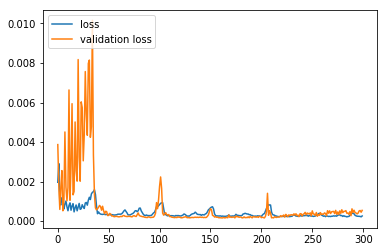

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'validation loss'], loc='upper left')
plt.show()

### Assessment of Model Generated Predictions

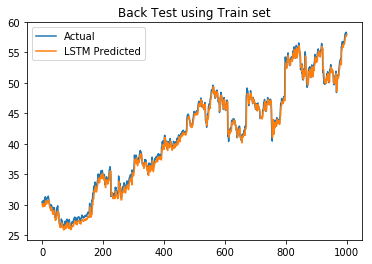

MAE :  0.20887365636229932


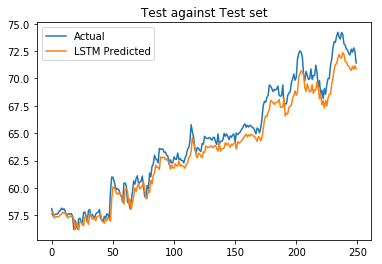

MAE :  0.11519852897940012


In [43]:
# 예측과 실제를 비교하는 챠트를 생성하는 함수
# 데이터셋을 변경하는 경우에도 재사용

def PredActPlot(x, y, title):
    plt.plot(scl.inverse_transform(y.reshape(-1,1)))
    Xt = model.predict(x)
    plt.plot(scl.inverse_transform(Xt))
    plt.legend(['Actual', 'LSTM Predicted'], loc='upper left')
    plt.title(title)
    plt.show()

    print('MAE : ' , abs(y - Xt).mean())
    
    
PredActPlot(X_train, y_train, 'Back Test using Train set')    

PredActPlot(X_test, y_test, 'Test against Test set')   

In [14]:
# [training back test]
# When 0 droput, MAE =  0.2068037956466343
# When 0.1 droput, MAE =   0.20893011636696093
# When 0.2 droput, MAE =   0.20855772144070903
# When 0.3 droput, MAE =   0.20789989521961694
# When 0.4 droput, MAE =   0.2086194820712931

# [test set scoring]
# When 0 droput, MAE =  0.1223689780640864
# When 0.1 droput, MAE =  0.1204013283316123
# When 0.2 droput, MAE =  0.11750664105373453
# When 0.3 droput, MAE =  0.1168065766005788
# When 0.4 droput, MAE =  0.11416013395691078

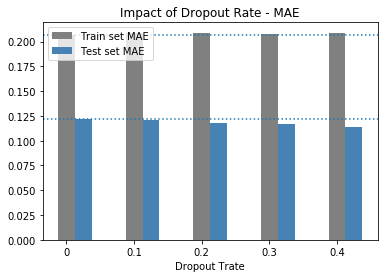

In [27]:
# Plotting MAEs using multiple bar charts

data = [[0.2068037956466343, 0.20893011636696093, 0.20855772144070903, 0.20789989521961694, 0.2086194820712931],
        [0.1223689780640864, 0.1204013283316123, 0.11750664105373453, 0.1168065766005788, 0.11416013395691078]]

X = np.arange(5)
plt.bar(X + 0.00, data[0], width = 0.25, color='grey')
plt.bar(X + 0.25, data[1], width = 0.25, color='steelblue')
plt.legend(['Train set MAE', 'Test set MAE'], loc='upper left')
plt.axhline(data[0][0], linestyle=':')
plt.axhline(data[1][0], linestyle=':')
plt.title('Impact of Dropout Rate - MAE')
plt.xlabel('Dropout Rate')
plt.xticks(np.arange(5), ('0', '0.1', '0.2', '0.3', '0.4'))
plt.show()

# dropout 조절에 따른 영향 시각화

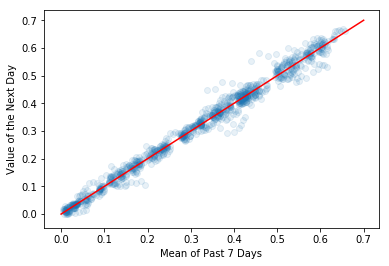

In [10]:
# a scatter plot of median of the past 7 days and the target?

plt.scatter(X_train.mean(axis=1), y_train, alpha=0.1)
plt.plot([0,0.7],[0,0.7], color='red')
plt.xlabel('Mean of Past 7 Days')
plt.ylabel('Value of the Next Day')
plt.show()

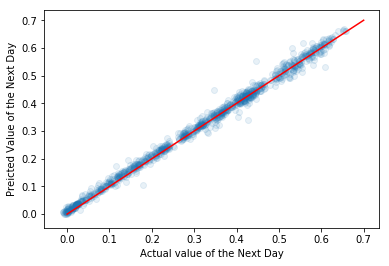

In [44]:
# Actutal vs. LSTM predicted?

Xt = model.predict(X_train)
plt.scatter(Xt, y_train, alpha=0.1)
plt.plot([0,0.7],[0,0.7], color='red')
plt.xlabel('Actual value of the Next Day')
plt.ylabel('Preicted Value of the Next Day')
plt.show()